In [1]:
## Get necessary imports
## Darshan Pai - Project 1
import numpy as np
import os
import shutil
import posixpath
import wfdb
import biosppy


In [2]:
## Download all the WFDB records from Physionet
cwd = os.getcwd()
dl_dir = os.path.join(cwd, "tmp_dl_dir")

wfdb.dl_database('apnea-ecg', dl_dir=dl_dir)

display(os.listdir(dl_dir))


Generating record list for: a01
Generating record list for: a01er
Generating record list for: a01r
Generating record list for: a02
Generating record list for: a02er
Generating record list for: a02r
Generating record list for: a03
Generating record list for: a03er
Generating record list for: a03r
Generating record list for: a04
Generating record list for: a04er
Generating record list for: a04r
Generating record list for: a05
Generating record list for: a06
Generating record list for: a07
Generating record list for: a08
Generating record list for: a09
Generating record list for: a10
Generating record list for: a11
Generating record list for: a12
Generating record list for: a13
Generating record list for: a14
Generating record list for: a15
Generating record list for: a16
Generating record list for: a17
Generating record list for: a18
Generating record list for: a19
Generating record list for: a20
Generating record list for: b01
Generating record list for: b01er
Generating record list for

['a01.apn',
 'a01.dat',
 'a01.hea',
 'a01.qrs',
 'a01er.apn',
 'a01er.hea',
 'a01er.qrs',
 'a01r.apn',
 'a01r.dat',
 'a01r.hea',
 'a02.apn',
 'a02.dat',
 'a02.hea',
 'a02.qrs',
 'a02er.apn',
 'a02er.hea',
 'a02er.qrs',
 'a02r.apn',
 'a02r.dat',
 'a02r.hea',
 'a03.apn',
 'a03.dat',
 'a03.hea',
 'a03.qrs',
 'a03er.apn',
 'a03er.hea',
 'a03er.qrs',
 'a03r.apn',
 'a03r.dat',
 'a03r.hea',
 'a04.apn',
 'a04.dat',
 'a04.hea',
 'a04.qrs',
 'a04er.apn',
 'a04er.hea',
 'a04er.qrs',
 'a04r.apn',
 'a04r.dat',
 'a04r.hea',
 'a05.apn',
 'a05.dat',
 'a05.hea',
 'a05.qrs',
 'a06.apn',
 'a06.dat',
 'a06.hea',
 'a06.qrs',
 'a07.apn',
 'a07.dat',
 'a07.hea',
 'a07.qrs',
 'a08.apn',
 'a08.dat',
 'a08.hea',
 'a08.qrs',
 'a09.apn',
 'a09.dat',
 'a09.hea',
 'a09.qrs',
 'a10.apn',
 'a10.dat',
 'a10.hea',
 'a10.qrs',
 'a11.apn',
 'a11.dat',
 'a11.hea',
 'a11.qrs',
 'a12.apn',
 'a12.dat',
 'a12.hea',
 'a12.qrs',
 'a13.apn',
 'a13.dat',
 'a13.hea',
 'a13.qrs',
 'a14.apn',
 'a14.dat',
 'a14.hea',
 'a14.qrs',
 'a1

In [16]:
## For each record process and append to the csv file
from hrvanalysis import remove_ectopic_beats, interpolate_nan_values, get_time_domain_features, get_frequency_domain_features, get_geometrical_features
from hrvanalysis import get_csi_cvi_features, get_poincare_plot_features 
import csv

csv_file = "features.csv"
enter = False

for root, directories, files in os.walk(dl_dir, topdown=False):
	with open('Annotations.txt', newline = '') as names:
		name_reader = csv.reader(names, delimiter='\t')
		for name in name_reader:
			#print(name)
			full_p = os.path.join(root, name[0])
			#print(full_p)
			record = wfdb.rdrecord(full_p, sampfrom=0, sampto=100000)
			ind = biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=False)
			rr_ind = np.diff(ind['rpeaks'])
			rr_ms = [element * 10 for element in rr_ind]
			ect_ind = remove_ectopic_beats(rr_ms)
			nn_interval = interpolate_nan_values(rr_intervals=ect_ind)
			time_dict = get_time_domain_features(nn_interval)
			results = {}
			results['avnn'] = time_dict['mean_nni']
			results['hr'] = time_dict['mean_hr']
			results['SDNN'] = time_dict['sdnn']
			results['pNN50'] = time_dict['pnni_20']
			results['RMSSD'] = time_dict['rmssd']
			results['HRdiff'] = time_dict['max_hr'] - time_dict['min_hr']
			freq_dict = get_frequency_domain_features(nn_interval)

			results['VLF'] = freq_dict['vlf']
			results['LF'] = freq_dict['lf']
			results['HF'] = freq_dict['hf']
			results['LHFratio'] = freq_dict['lf_hf_ratio']
			results['record']=name[0]
			results['length-min']=name[1]
			results['non-apn-min']=name[2]
			results['apn-min']=name[3]
			results['hours-apn']=name[4]
			results['AI']=name[5]
			results['HI']=name[6]
			results['AHI']=name[7]
			results['Age']=name[8]
			results['Sex']=name[9]
			results['height']=name[10]
			results['weight']=name[11]
			print(results)
			csv_columns = results.keys()
			with open(csv_file, 'a', newline='') as csvfile:
				writer = csv.DictWriter(csvfile, fieldnames=csv_columns) 
				if enter == False:
					writer.writeheader()
					enter = True
				writer.writerow(results)


10 ectopic beat(s) have been deleted with malik rule.
{'avnn': 831.5137614678899, 'hr': 73.04062883477803, 'SDNN': 90.6995053435377, 'pNN50': 47.24540901502504, 'RMSSD': 43.32246985099053, 'HRdiff': 45.45454545454545, 'VLF': 1253.0659317695213, 'LF': 1672.2046668444693, 'HF': 663.069710839543, 'LHFratio': 2.5219138191777972, 'record': 'a01', 'length-min': '490', 'non-apn-min': '20', 'apn-min': '470', 'hours-apn': '9', 'AI': '12.5', 'HI': '57.1', 'AHI': '69.6', 'Age': '51', 'Sex': 'M', 'height': '175', 'weight': '102'}
20 ectopic beat(s) have been deleted with malik rule.
{'avnn': 755.933484504913, 'hr': 84.55735826708907, 'SDNN': 64.42473324065006, 'pNN50': 9.07715582450832, 'RMSSD': 37.1334837135976, 'HRdiff': 5941.747572815534, 'VLF': 971.5964907559306, 'LF': 772.9338443279158, 'HF': 410.65467891836596, 'LHFratio': 1.882199044617649, 'record': 'a02', 'length-min': '529', 'non-apn-min': '109', 'apn-min': '420', 'hours-apn': '9', 'AI': '57.2', 'HI': '12.3', 'AHI': '69.5', 'Age': '38', 

In [1]:
### After data is generated do not run anything before this cell.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
## Split Apnea and non-Apnea data
## Load the feature csv file
Data = pd.read_csv('features.csv')
Apnea_data = Data[Data.AHI>4]
NonApnea_data = Data[Data.AHI<=4]

In [29]:
print(f"Number of datasets with Apnea {len(Apnea_data)}")
print(f"Number of datasets that do not have Apnea {len(NonApnea_data)}")

Number of datasets with Apnea 47
Number of datasets that do not have Apnea 23


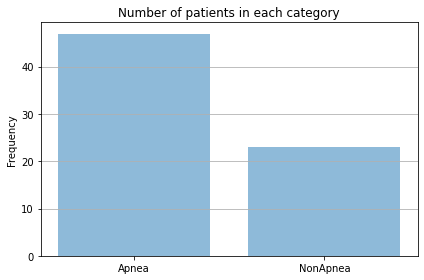

In [31]:
## Plot as a bar chart
%matplotlib inline 
categories = ['Apnea', 'NonApnea']
counts = [len(Apnea_data), len(NonApnea_data)]

fig, ax = plt.subplots()
x_pos = np.arange(len(categories))
plt.bar(x_pos, counts, align='center', alpha=0.5)
ax.set_ylabel('Frequency')
ax.set_xticks(x_pos)
ax.set_xticklabels(categories)
ax.set_title('Number of patients in each category')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()


In [35]:
## Proportion of men and women in the 2 categories
print(f"Proportion of men within the Apnea class is {len(Apnea_data[Apnea_data.Sex == 'M'])/len(Apnea_data)}")
print(f"Proportion of men within the Non Apnea class is {len(NonApnea_data[NonApnea_data.Sex == 'M'])/len(NonApnea_data)}")

Proportion of men within the Apnea class is 0.9574468085106383
Proportion of men within the Non Apnea class is 0.5217391304347826


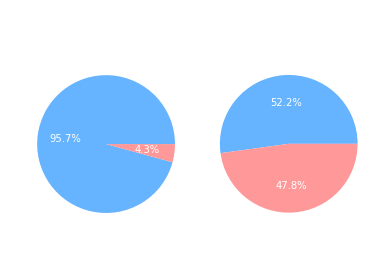

In [67]:
# Pie charts showing the proportions based on sex
males_Apnea = (len(Apnea_data[Apnea_data.Sex == 'M'])/len(Apnea_data))*100
males_nonApnea = (len(NonApnea_data[NonApnea_data.Sex == 'M'])/len(NonApnea_data))*100
sizes_Apnea = [males_Apnea, 100-males_Apnea]
sizes_NonApnea = [males_nonApnea, 100-males_nonApnea]

colors = ['#66b3ff', '#ff9999']

fig, ax = plt.subplots(1,2)
ax[0].pie(sizes_Apnea, labels=['Male', 'Female'], autopct='%1.1f%%', colors = colors, textprops={'color':"w"})
ax[0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax[0].set_title('Apnea patients', color='white')

ax[1].pie(sizes_NonApnea, labels=['Male', 'Female'], autopct='%1.1f%%',  colors = colors, textprops={'color':"w"})
ax[1].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax[1].set_title('Non Apnea patients', color='white')
fig.suptitle("Male/Female ratio", color='white')

plt.show()

Text(0.5, 0.98, 'Age Distribution')

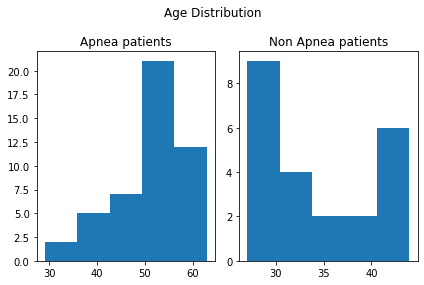

In [59]:
## Age Distribution
n_bins = 5
fig, axs = plt.subplots(1, 2, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(Apnea_data.Age, bins=n_bins)
axs[0].set_title('Apnea patients')
axs[1].hist(NonApnea_data.Age, bins=n_bins)
axs[1].set_title('Non Apnea patients')
fig.suptitle("Age Distribution")

In [25]:
Data['Target'] = np.where(Data['AHI']>4,'A','H')
print(len(Data[Data.Target=='A']))

47


In [41]:
## Save the data for Weka
Data.to_csv('ApneaDataSet.csv', index=False)

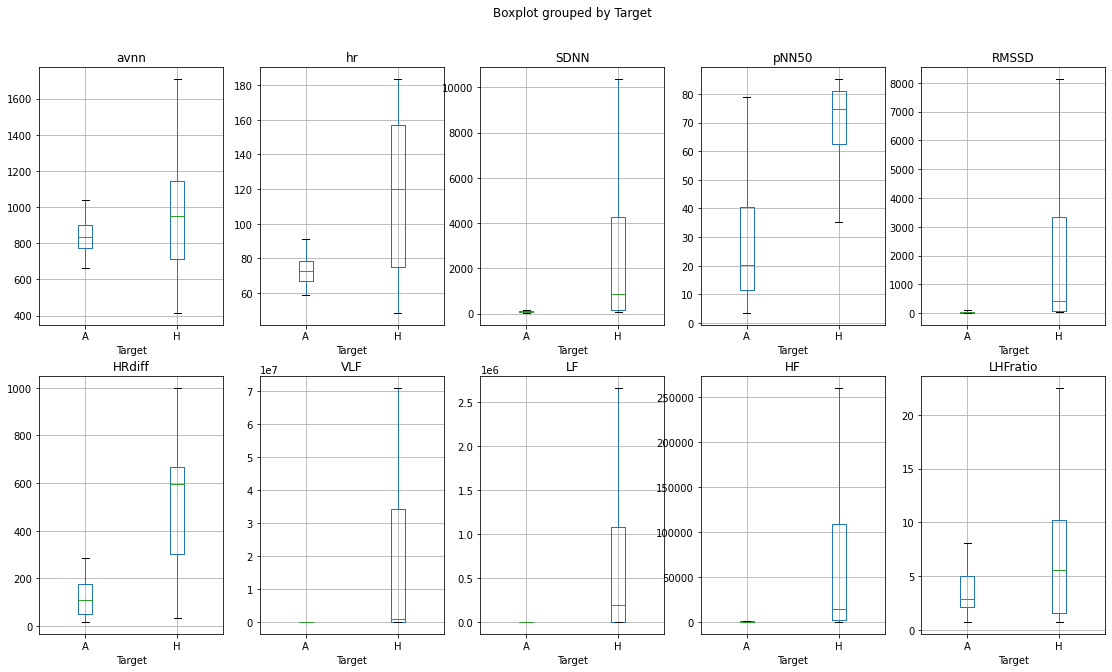

In [38]:
fig2, ax2 = plt.subplots(2,5)
fig2.suptitle("Box Plot of HRV features (Apnea) vs (Healthy)")
fig2.set_size_inches(18.5, 10.5)

for i,el in enumerate(list(Data.columns.values)[:10]):
    a = Data.boxplot(el, by="Target", ax=ax2.flatten()[i], showfliers=False)

In [35]:
Apnea_data.describe()

,avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,length-min,non-apn-min,apn-min,hours-apn,AI,HI,AHI,Age,height,weight
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1190.076307,76.483394,2402.893491,27.760478,1940.987181,550.641390,1.037887e+07,1.516962e+06,1.291538e+05,5.042977,503.808511,227.212766,276.595745,7.489362,32.523404,9.210638,41.734043,50.595745,176.255319,97.276596
std,2424.394005,20.443616,14851.106917,22.338512,12270.136058,1488.802808,6.699046e+07,1.027616e+07,8.752563e+05,6.529312,26.142285,132.261917,139.118601,2.175679,22.750090,10.237638,23.558090,8.055945,3.703512,16.370310
min,488.181464,58.761388,32.960686,3.581871,13.125471,16.923077,2.197134e+02,2.357354e+02,3.274369e+01,0.752200,434.000000,11.000000,13.000000,1.000000,1.800000,0.000000,5.000000,29.000000,167.000000,69.000000
25%,771.794388,66.827767,50.034500,11.474069,23.025556,49.656665,6.950647e+02,4.655820e+02,1.712335e+02,2.133171,492.000000,121.000000,178.000000,6.500000,14.200000,3.500000,21.000000,44.000000,176.000000,85.000000
50%,835.661088,72.543351,64.424733,20.411272,30.957520,107.894737,9.578602e+02,8.611401e+02,3.050841e+02,2.939343,510.000000,215.000000,291.000000,8.000000,27.300000,6.700000,41.000000,52.000000,177.000000,96.000000
75%,900.196398,78.611294,93.669976,40.456388,53.564634,177.506194,1.689783e+03,2.051007e+03,9.349092e+02,4.997786,517.000000,320.500000,382.000000,9.000000,47.000000,10.300000,59.600000,56.000000,179.000000,105.000000
max,17441.346154,166.378184,101765.236602,84.177708,84112.241637,5976.284585,4.589937e+08,7.046431e+07,6.001843e+06,32.557475,578.000000,471.000000,534.000000,10.000000,86.800000,57.100000,93.500000,63.000000,183.000000,135.000000


In [36]:
NonApnea_data.describe()

,avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,length-min,non-apn-min,apn-min,hours-apn,AI,HI,AHI,Age,height,weight
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,955.019818,115.104991,2886.000643,68.158962,2171.285173,783.078230,1.853291e+07,1.145587e+06,1.548196e+05,7.578346,467.347826,464.478261,2.869565,0.173913,0.063478,0.016087,0.079565,34.000000,175.000000,65.260870
std,291.135278,45.230677,3651.686445,17.253046,2811.017962,1204.797937,2.538524e+07,2.218149e+06,3.846696e+05,7.424674,27.659634,28.181021,4.683669,0.491026,0.163752,0.056788,0.170919,6.274045,8.257228,8.247409
min,415.305247,48.668867,68.331607,33.203883,45.767492,32.972973,7.587059e+02,1.336172e+03,4.216943e+02,0.767751,401.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,158.000000,53.000000
25%,714.917635,74.859114,141.284792,62.612053,83.248236,302.848412,2.812509e+03,2.804487e+03,1.889035e+03,1.585038,454.500000,452.500000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,169.500000,60.000000
50%,951.948424,120.215738,857.702827,74.860335,428.256316,595.759717,9.031529e+05,1.998206e+05,1.418373e+04,5.578502,469.000000,468.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,180.000000,65.000000
75%,1142.551818,157.070909,4274.229030,81.131257,3337.331151,665.956434,3.417645e+07,1.080738e+06,1.088584e+05,10.256517,483.000000,482.000000,3.000000,0.000000,0.000000,0.000000,0.065000,40.000000,182.000000,69.000000
max,1710.571827,183.813548,10387.294675,85.373781,8147.339311,5999.716727,7.093625e+07,1.011680e+07,1.813533e+06,22.498659,535.000000,535.000000,19.000000,2.000000,0.700000,0.250000,0.700000,44.000000,184.000000,83.000000


In [51]:
print(f"From just looking at the plots and summary time features SDNN, RMSSD and frequency features HF is more significant")
print(f"This can be seen though the non-parametric test below. Compared with avnn which is not significant")

From just looking at the plots and summary time features SDNN, RMSSD and frequency features HF is more significant
This can be seen though the non-parametric test below. Compared with avnn which is not significant


In [44]:
## Using t-test below for the 10 features
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu

## I think these are dependent samples
ttest_rel(Apnea_data.HF, NonApnea_data.HF)

ValueError: unequal length arrays

In [47]:
U1, p = mannwhitneyu(Apnea_data.HF, NonApnea_data.HF, method="auto")
print(U1,p)

86.0 1.372287469649795e-08


In [48]:
U1, p = mannwhitneyu(Apnea_data.RMSSD, NonApnea_data.RMSSD, method="auto")
print(U1,p)

107.0 6.155387535369218e-08


In [49]:
U1, p = mannwhitneyu(Apnea_data.SDNN, NonApnea_data.SDNN, method="auto")
print(U1,p)

114.0 1.0001339683982572e-07


In [50]:
U1, p = mannwhitneyu(Apnea_data.avnn, NonApnea_data.avnn, method="auto")
print(U1,p)

449.0 0.25517767321655005


In [ ]:
print(f"Did Machine learning using Weka, used Naive Bayes, Logistic, and Random Forest")
print(f"With a 80% train/test split and CV of 5, each gives 100% accuracy. Logs added")